### Scripts Python : processing

In [ ]:
import os
import pandas as pd

##### Columns selection (MAJ possible selon les var pertinentes au modèle)

In [ ]:
# Pour les nouvelles données
def select_columns(new_data):

    relevant_columns = ['Conso_chauffage_dépensier_é_finale',
                        'Emission_GES_ECS',
                        'Type_énergie_n°1',
                        'Emission_GES_chauffage',
                        'Date_réception_DPE',
                        'Coût_ECS_énergie_n°1',
                        'Conso_ECS_é_finale',
                        'Coût_total_5_usages',
                        'Emission_GES_5_usages',
                        'Conso_éclairage_é_finale',
                        'Coût_refroidissement_dépensier',
                        'Date_fin_validité_DPE',
                        'Coordonnée_cartographique_X_(BAN)',
                        'Nombre_niveau_logement',
                        'Emission_GES_refroidissement_dépensier',
                        'Type_bâtiment',
                        'Conso_5_usages_par_m²_é_primaire',
                        'Coût_refroidissement',
                        'Ubat_W/m²_K',
                        'Coût_ECS_dépensier',
                        'Coût_chauffage',
                        'Emission_GES_auxiliaires',
                        'Emission_GES_5_usages_par_m²',
                        'Emission_GES_éclairage',
                        '_geopoint',
                        'Conso_ECS_dépensier_é_primaire',
                        'Zone_climatique_',
                        'Conso_refroidissement_dépensier_é_finale',
                        'Conso_ECS_dépensier_é_finale',
                        'Version_DPE',
                        'Date_visite_diagnostiqueur',
                        'Coût_ECS',
                        'Type_énergie_principale_chauffage',
                        'Coût_éclairage',
                        'Date_établissement_DPE',
                        'Qualité_isolation_enveloppe',
                        'Emission_GES_chauffage_dépensier',
                        'N°DPE',
                        'Conso_refroidissement_é_finale',
                        'Conso_chauffage_é_primaire',
                        'Adresse_brute',
                        'Conso_éclairage_é_primaire',
                        'Conso_ECS_é_primaire',
                        'Qualité_isolation_menuiseries',
                        'Qualité_isolation_murs',
                        'Emission_GES_5_usages_énergie_n°1',
                        'Etiquette_GES',
                        'Conso_5_usages_é_finale_énergie_n°1',
                        'Statut_géocodage',
                        'Conso_auxiliaires_é_primaire',
                        'Conso_auxiliaires_é_finale',
                        'Conso_chauffage_é_finale',
                        'Coût_chauffage_dépensier',
                        'Modèle_DPE',
                        'Etiquette_DPE',
                        'Conso_refroidissement_dépensier_é_primaire',
                        'Conso_5_usages_é_finale',
                        'N°_département_(BAN)',
                        'Conso_refroidissement_é_primaire',
                        'Coût_chauffage_énergie_n°1',
                        'Méthode_application_DPE',
                        'Qualité_isolation_plancher_bas',
                        'Conso_5_usages/m²_é_finale',
                        'Hauteur_sous-plafond',
                        'Identifiant__BAN',
                        'Surface_habitable_logement',
                        'Code_postal_(brut)',
                        'Coût_auxiliaires',
                        'Coordonnée_cartographique_Y_(BAN)',
                        'Conso_chauffage_dépensier_é_primaire',
                        'Emission_GES_ECS_dépensier',
                        'Code_INSEE_(BAN)',
                        'Score_BAN',
                        'Emission_GES_refroidissement',
                        'Classe_altitude',
                        'Conso_5_usages_é_primaire',
                        'Besoin_refroidissement',
                        'Déperditions_murs',
                        'Besoin_ECS',
                        'Deperditions_planchers_bas',
                        'Deperditions_planchers_hauts',
                        'Déperditions_renouvellement_air',
                        'Déperditions_portes',
                        'Deperditions_baies_vitrées',
                        'Déperditions_ponts_thermiques',
                        'Besoin_chauffage',
                        'Deperditions_enveloppe',
                        'Classe_inertie_bâtiment'
                        ]

    new_data = new_data[relevant_columns]

    return new_data

##### Création de variables

In [ ]:
# Pour les nouvelles données
def get_year_of_construct(value):
    year = int(value[:4])
    return year

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
59208    2021
59209    2021
59210    2021
59211    2021
59212    2021
Name: Date_visite_diagnostiqueur, Length: 59213, dtype: int64

In [ ]:
# Pour les nouvelles données
def create_vars(new_data):
    if (not pd.Series(["Logement"]).isin(new_data.columns)[0]):
        new_data["Logement"] = 'neuf'

    if (not pd.Series(["Année_construction"]).isin(new_data.columns)[0]):
        from datetime import date
        new_data["Année_construction"] = new_data["Date_visite_diagnostiqueur"].apply(get_year_of_construct)

    return new_data

##### Cleaning and converting wrongly encoded data ("," vs ".")

In [ ]:
# Pour les nouvelles données
def clean_and_convert(value):
    if pd.isna(value):  # Vérifie la présence de valeurs NaN ou de chaînes ' NaN'
        return value  # Préserve les NaN en tant que valeur None
    else:
        value = str(value).replace(',', '.')  # Remplace les virgules par des points
        return pd.to_numeric(value, errors='coerce')  # Conversion en valeur numérique

In [ ]:
# Pour les nouvelles données
def cleaning_and_converting(new_data):
    new_data.loc[:,"Besoin_ECS"] = new_data["Besoin_ECS"].apply(clean_and_convert)
    new_data.loc[:,"Besoin_refroidissement"] = new_data["Besoin_refroidissement"].apply(clean_and_convert)
    return new_data

##### **Embranchement 1** : Importation des données initiales et prétraitement (optimisé pour les débits internet limités)

In [ ]:
# Importation des données
logements_neufs = pd.read_csv(os.path.join('data','raw','neufs.csv'))
logements_existants = pd.read_csv(os.path.join('data','raw','existents.csv'))

In [ ]:
logements_neufs = select_columns(logements_neufs)
logements_neufs.shape

(59213, 96)

In [ ]:
logements_existants = select_columns(logements_existants)
logements_existants.shape

(398114, 96)

In [ ]:
# Pour les anciens
logements_existants["Logement"] = "ancien"
logements_existants["Année_construction"] = logements_existants["Date_visite_diagnostiqueur"].apply(get_year_of_construct)

# Pour les neufs (et les futures données qui seront produites)
logements_neufs = create_vars(logements_neufs)

In [ ]:
logements_existants = cleaning_and_converting(logements_existants)
logements_neufs = cleaning_and_converting(logements_neufs)

In [ ]:
df = pd.concat([logements_existants, logements_neufs], ignore_index=True, axis=0)

In [ ]:
# A décommenter si on veut produire le csv du dataset déjà pré-traité
# df.to_csv(os.path.join('data','processed','full_data_bretagne.csv'), index=False, sep=";", encoding="utf-8-sig")

##### **Embranchement 2** : Importation des données pré-traitées

In [1]:
import os 
import pandas as pd

df = pd.read_csv(os.path.join('data','processed','full_data_bretagne.csv'), sep=";")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13684\3161104948.py:4: DtypeWarning: Columns (71,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('data','processed','full_data_bretagne.csv'), sep=";")


##### Split train/test

In [2]:
def data_split(data, target="Etiquette_DPE", test_size=0.3, stratify=True, seed=0):
    from sklearn.model_selection import train_test_split

    if stratify:
        return train_test_split(data, test_size=test_size, random_state=seed, stratify=data[target])
    else:
        return train_test_split(data, test_size=test_size, random_state=seed)

In [3]:
X_train, X_test = data_split(df, target="Etiquette_DPE", test_size=0.3, stratify=True, seed=0)

##### Qualitative and quantitative data processing (after train/test split)

In [4]:
# Pour toutes les données (cf. paramètres de la fonction)

# exporter params d'un retrain pour les recharger tant que retrain=False
# exporter fit du train (original_data) tant que retrain=False (optimisation des calculs)
def quali_quanti_preprocessing(original_data, new_data):
    import pandas as pd
    
    # QUALITATIVE PREPROCESSING

    # On remplace des adresses inconnues par la chaîne "inconnu"
    # new_data['Identifiant__BAN'] = new_data['Identifiant__BAN'].fillna('inconnu')
    # new_data['Nom__rue_(BAN)'] = new_data['Nom__rue_(BAN)'].fillna('inconnu')
    # new_data['Adresse_(BAN)'] = new_data['Adresse_(BAN)'].fillna('inconnu')
    # new_data['Adresse_brute'] = new_data['Adresse_brute'].fillna('inconnu')
    # Le code est encodé parfois en tant que chaîne ou entier. On uniformise en chaîne de caractères
    original_data['Code_INSEE_(BAN)'] = original_data['Code_INSEE_(BAN)'].apply(lambda x: str(x) if pd.notna(x) else x)
    new_data['Code_INSEE_(BAN)'] = new_data['Code_INSEE_(BAN)'].apply(lambda x: str(x) if pd.notna(x) else x)

    quali_data_new = new_data.select_dtypes(include=['object'])
    for column in quali_data_new.columns:
        # Calcul de la proportion (probabilité) des modalités dans chaque variable qualitative
        proportions = original_data[column].value_counts(normalize=True)
        
        # On applique la fonction à la colonne
        filling = proportions.sample(weights=proportions, replace=True).index[0]
        original_data[column] = original_data[column].fillna(filling)
        filling = proportions.sample(weights=proportions, replace=True).index[0]
        quali_data_new[column] = quali_data_new[column].fillna(filling)
        

        # if retrain:
        #     quali_data_orig = original_data.select_dtypes(include=['object'])
        #     quali_data_orig[column] = quali_data_orig.apply(impute_with_proportions, axis=1)
    

    # QUANTITATIVE PREPROCESSING
    ## Missing values
    from sklearn.impute import SimpleImputer
    quanti_data_new = new_data.select_dtypes(exclude=['object'])
    imputer = SimpleImputer(strategy="median")
    original_data[quanti_data_new.columns] = imputer.fit_transform(original_data[quanti_data_new.columns])
    quanti_data_new[quanti_data_new.columns] = imputer.transform(quanti_data_new)

    ## Standardization

    
    new_data_processed = pd.concat([quali_data_new, quanti_data_new], axis=1)
    return original_data, new_data_processed

In [5]:
orig, new = quali_quanti_preprocessing(X_train, X_test)

##### Split regressors/target

In [6]:
def define_target(train, test, target="Etiquette_DPE"):
    X_train = train[train.columns.difference([target])]
    y_train = train[target]
    X_test = test[test.columns.difference([target])]
    y_test = test[target]
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = define_target(orig, new, target="Etiquette_DPE")

#### Split des données quanti et quali

In [1]:
def to_drop_before_model(case="classification"):
    if case=="classification":
        return ["Adresse_brute","Code_INSEE_(BAN)", "Date_fin_validité_DPE", "Date_réception_DPE", 
           "Date_visite_diagnostiqueur", "Date_établissement_DPE", "Identifiant__BAN", "N°DPE", "_geopoint"]
    elif case=="regression":
        return []
    else:
        print("Error. Only 'classification' or 'regression' supported")
        return

In [ ]:
to_drop = to_drop_before_model(case="classification")

In [ ]:
def split_type(X_train, X_test, to_drop):
    quali_train = X_train.select_dtypes(include="object")
    quali_train = quali_train.drop(to_drop, axis=1) # Inutile de faire une ACM sur une variable avec autant de modalités possibles
    quali_test = X_test.select_dtypes(include="object")
    quali_test = quali_test.drop(to_drop, axis=1) # Inutile de faire une ACM sur une variable avec autant de modalités possibles

    quanti_train = X_train.select_dtypes(exclude="object")
    quanti_test = X_test.select_dtypes(exclude="object")
    return quali_train, quali_test, quanti_train, quanti_test

In [ ]:
quali_train, quali_test, quanti_train, quanti_test = split_type(X_train, X_test, to_drop)

#### ACM

In [ ]:
def chunking_MCA(quali_train, quali_test, n_components, n_iter, seed, chunk_size):
    # Exportation en csv pour le chunking
    quali_train.to_csv(os.path.join('data','processed','quali_train.csv'), index=False, sep=";", encoding="utf-8-sig")
    quali_test.to_csv(os.path.join('data','processed','quali_test.csv'), index=False, sep=";", encoding="utf-8-sig")

    import prince

    mca = prince.MCA(
        n_components=n_components,
        n_iter=n_iter,
        copy=False,
        check_input=False,
        random_state=seed,
        engine="sklearn",
        handle_unknown="error"  # paramètre identique à celui de sklearn.preprocessing.OneHotEncoder
    )

    print("MCA : fitting to train set")
    quali_train_mca_lst = []
    i = 0
    for chunk in pd.read_csv(os.path.join('data','processed','quali_train.csv'), sep=';', chunksize=chunk_size):
        mca = mca.fit(chunk)
        quali_train_mca_lst.append(mca.transform(chunk))
        i += 1
        if i%100==0:
            print((i*chunk_size)/quali_train.shape[0])
    
    quali_train_mca = pd.DataFrame()
    for elem in quali_train_mca_lst:
        quali_train_mca = pd.concat([quali_train_mca, pd.DataFrame(elem)], axis=0, ignore_index=True)

    print("MCA : transforming test set")

    quali_test_mca_lst = []
    i = 0
    for chunk in pd.read_csv(os.path.join('data','processed','quali_test.csv'), sep=';', chunksize=chunk_size):
        quali_test_mca_lst.append(mca.transform(chunk))
        i += 1
        if i%50==0:
            print((i*chunk_size)/quali_test.shape[0])
    
    quali_test_mca = pd.DataFrame()
    for elem in quali_test_mca_lst:
        quali_test_mca = pd.concat([quali_test_mca, pd.DataFrame(elem)], axis=0, ignore_index=True)

    return quali_train, quali_test

In [ ]:
import prince

mca = prince.MCA(
    n_components=23,
    n_iter=3,
    copy=False,
    check_input=False,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # paramètre identique à celui de sklearn.preprocessing.OneHotEncoder
)

quali_train_mca_lst = []
chunk_size = 1000
i = 0
for chunk in pd.read_csv(os.path.join('data','processed','quali_train.csv'), sep=';', chunksize=chunk_size):
    mca = mca.fit(chunk)
    quali_train_mca_lst.append(mca.transform(chunk))
    i += 1
    if i%100==0:
        print((i*chunk_size)/df.shape[0])
        

0.21866192024525122
0.43732384049050244
0.6559857607357537


In [69]:
quali_train_mca = pd.DataFrame()
for elem in quali_train_mca_lst:
    quali_train_mca = pd.concat([quali_train_mca, pd.DataFrame(elem)], axis=0, ignore_index=True)

quali_train_mca

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.419258,-0.880264,0.135345,-0.069808,0.033830,-0.125835,-0.140556,-0.163690,-0.319590,0.274601,...,0.435927,-0.175832,0.092541,0.031593,-0.151344,-0.286976,-0.385000,-0.165615,-0.105866,0.012177
1,-0.567443,-0.006155,0.727673,-0.158155,-0.529249,0.244425,0.000455,-0.095276,0.369732,-0.088636,...,-0.147479,0.215134,0.432310,0.327489,0.005239,0.569907,-0.086299,0.152444,0.143646,-0.753814
2,1.476600,0.811265,0.321735,-0.197050,-0.243647,-0.135378,-0.057741,-0.002528,0.162519,0.199667,...,0.244318,-0.204372,-0.337996,0.018592,0.200004,0.126539,-0.132486,-0.134804,0.047894,-0.000888
3,0.214720,-0.558428,0.116579,0.184930,-0.265718,-0.064771,-0.163924,-0.189088,0.336464,0.135486,...,0.200350,0.297932,0.140192,-0.191691,0.075298,-0.204569,-0.154532,0.168598,0.031396,0.068849
4,-0.170420,-0.660310,-0.059133,0.299360,-0.277996,-0.027148,-0.149588,-0.112349,0.134775,0.273046,...,-0.305974,0.217579,0.025115,0.010807,-0.011475,0.124179,0.165683,0.134798,-0.005276,-0.178531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320123,-0.144484,-0.294571,0.230433,-0.452746,-0.082554,0.204637,-0.008255,0.378819,-0.162496,0.185341,...,0.349716,0.025004,0.044015,-0.173713,0.161690,-0.169844,-0.273466,0.071561,0.223117,-0.251939
320124,-0.244644,0.325462,-0.226887,-0.082968,0.056322,-0.122928,-0.020760,-0.212716,0.191606,-0.202813,...,-0.664135,0.401877,0.271225,-0.200836,-0.256426,0.006883,-0.128761,0.183456,-0.084999,-0.198770
320125,-0.803362,0.590084,1.521125,-0.024259,-0.370045,0.030074,0.017441,0.093831,0.246741,-0.351283,...,-0.417852,0.622617,-0.074274,0.362952,-0.266007,0.271904,0.692476,0.160117,-0.059881,0.438514
320126,-0.362955,-0.505086,-0.164697,0.957144,0.477065,-0.018971,0.061040,-0.407335,0.063886,0.501601,...,-0.229326,0.023451,-0.210553,0.110447,0.065621,0.556165,-0.283629,0.297335,0.551553,-0.101958


In [ ]:
quali_test_mca_lst = []
i = 0
for chunk in pd.read_csv(os.path.join('data','processed','quali_test.csv'), sep=';', chunksize=chunk_size):
    quali_test_mca_lst.append(mca.transform(chunk))
    i += 1
    if i%50==0:
        print((i*chunk_size)/df.shape[0])

0.8746476809810049


In [71]:
quali_test_mca = pd.DataFrame()
for elem in quali_test_mca_lst:
    quali_test_mca = pd.concat([quali_test_mca, pd.DataFrame(elem)], axis=0, ignore_index=True)

quali_test_mca

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.092396,0.146747,-0.334290,0.141643,-0.292125,0.085691,0.105272,0.276145,-0.355574,-0.112058,...,0.095446,-0.158944,-0.383913,-0.044106,-0.112255,0.128859,0.121040,0.014682,0.046903,-0.108183
1,-0.793883,1.028868,1.864233,0.025649,-0.354586,0.049926,-0.268385,-0.423178,0.208459,0.382578,...,-0.313814,0.011789,0.007838,0.124319,0.218254,0.351249,0.109390,-0.165942,-0.277759,-0.448894
2,-0.140296,-0.169978,-0.129715,0.303900,-0.136295,-0.143465,0.161219,0.458661,0.006669,-0.165706,...,0.016948,-0.424584,0.298026,0.150325,0.653234,0.051919,-0.090869,0.324702,-0.411250,-0.267065
3,-0.387469,-0.638470,-0.045672,-0.160879,0.096440,-0.241158,-0.110769,-0.227291,-0.134155,-0.353844,...,-0.006810,-0.337219,0.440693,0.225188,0.470706,-0.530437,0.067033,0.440041,-0.652237,-0.224770
4,0.097760,-0.598774,-0.055070,-0.344162,-0.085992,0.026203,-0.109284,-0.359237,-0.159287,0.022486,...,-0.119040,-0.097192,-0.097870,-0.459828,0.092233,0.543493,0.462083,-0.305318,-0.548775,-0.180701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137194,-0.591439,0.037496,0.369585,-0.588587,-0.087604,-0.080302,0.158376,-0.033616,0.317970,-0.480781,...,-0.520309,0.067176,0.073269,0.182618,-0.334342,0.086324,0.004833,0.097699,0.320942,0.153339
137195,-0.447581,-0.257509,0.194012,-0.471765,-0.024730,0.089463,-0.058370,0.214683,-0.304447,-0.055536,...,0.376579,-0.114219,0.085093,-0.317501,0.181109,-0.152210,-0.359337,0.088374,0.079989,-0.321937
137196,-0.057023,-0.086539,-0.454813,-0.008244,-0.091812,0.087269,0.105668,0.012159,0.067828,0.372213,...,0.298246,-0.103210,-0.353949,0.008882,-0.267397,-0.195398,0.586016,-0.345655,0.065511,-0.344428
137197,-0.707660,0.993356,1.977660,0.343192,-0.357561,0.145176,-0.255482,-0.213368,0.120966,0.286927,...,0.103991,0.117533,-0.100185,0.315232,-0.012965,0.055749,0.258428,-0.213205,-0.294753,-0.183425


In [73]:
# Convert colnames to str
quali_train_mca.columns = quali_train_mca.columns.astype(str)
quali_test_mca.columns = quali_test_mca.columns.astype(str)

quali_train_mca.set_index(X_train.index, inplace=True)
quali_test_mca.set_index(X_test.index, inplace=True)

# Concaténer, quali_train et quanti_train de même avec test
X_train_mca = pd.concat([X_train.select_dtypes(exclude="object"), quali_train_mca], axis=1)
X_test_mca = pd.concat([X_test.select_dtypes(exclude="object"), quali_test_mca], axis=1)

# X_train_mca = X_train.select_dtypes(exclude="object").merge(quali_train_mca, on=quali_train_mca.index, how="outer")
# X_test_mca = X_test.select_dtypes(exclude="object").merge(quali_test_mca, on=quali_test_mca.index, how="outer")

In [ ]:
to_drop = ["Conso_5_usages_é_primaire", "Conso_chauffage_é_primaire", "Coût_chauffage_dépensier", 
           "Emission_GES_5_usages", "Conso_5_usages_par_m²_é_primaire"]
X_train_mca = X_train_mca.drop(to_drop, axis=1)
X_test_mca = X_test_mca.drop(to_drop, axis=1)

### Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_mca_scaled = pd.DataFrame(scaler.fit_transform(X_train_mca), index=X_train_mca.index, columns=X_train_mca.columns)
X_test_mca_scaled = pd.DataFrame(scaler.transform(X_test_mca), index=X_test_mca.index, columns=X_test_mca.columns)

### Feature selection et modélisation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0, verbose=1)
rf.fit(X_train_mca_scaled, y_train)
y_pred = rf.predict(X_test_mca_scaled)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      8402
           B       1.00      0.99      0.99      7973
           C       1.00      1.00      1.00     41301
           D       0.99      1.00      0.99     38342
           E       0.99      0.99      0.99     24184
           F       0.99      0.99      0.99     10051
           G       0.99      0.99      0.99      6946

    accuracy                           0.99    137199
   macro avg       0.99      0.99      0.99    137199
weighted avg       0.99      0.99      0.99    137199



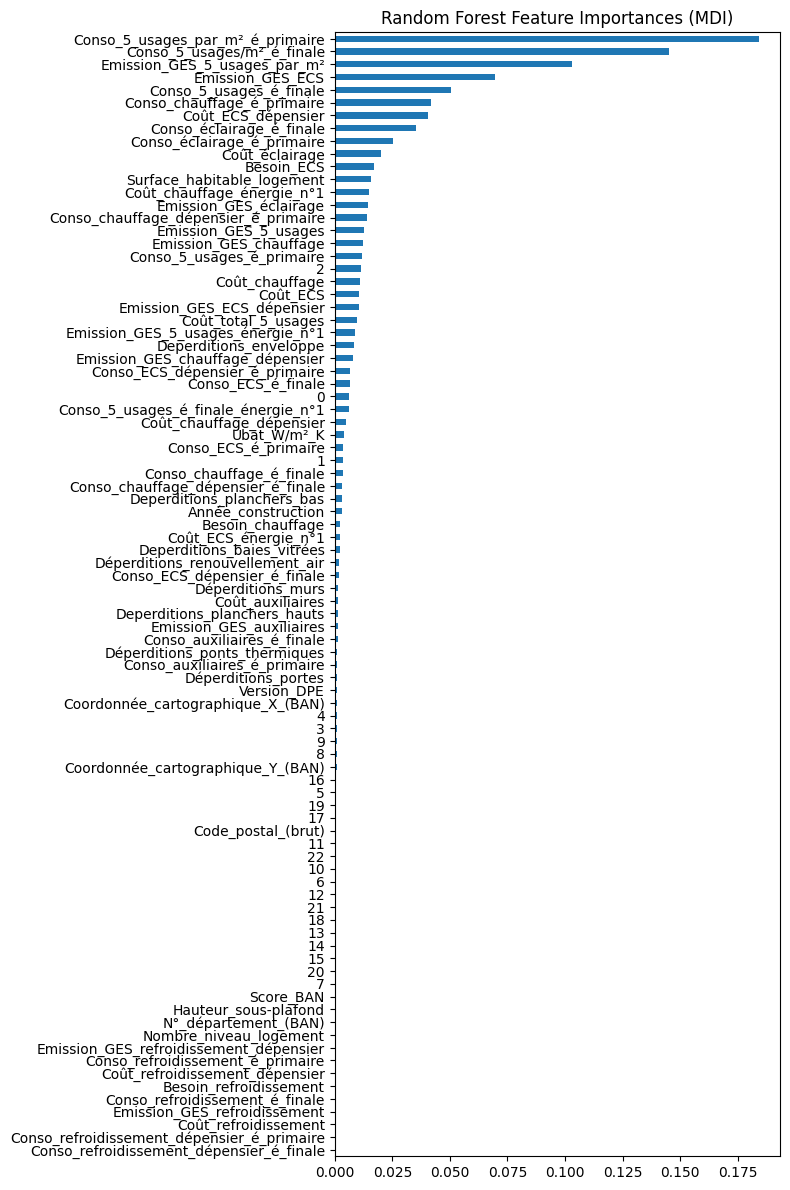

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))

feature_names = rf.feature_names_in_

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()